### 0. Import files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 300)

In [3]:
# In the future, import train_ID and test_ID directly:
train_ID = pd.read_csv('./data/train_01_index.csv', names = ['Id'])
test_ID = pd.read_csv('./data/test_index.csv', names = ['Id'])

In [4]:
train_ID.head(2)

,Id
0,1
1,2


In [5]:
test_ID.head(2)

,Id
0,1461
1,1462


In [6]:
X_train = pd.read_csv('./data/X_train_01.csv')
X_test = pd.read_csv('./data/X_test_01.csv')
y_train = pd.read_csv('./data/y_train_01_log.csv', names = ['SalePrice'])

In [7]:
print(X_train.shape, X_test.shape, y_train.shape)

(1458, 79) (1459, 79) (1458, 1)


In [8]:
X_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,14.0,3.0,5.831328,19.212182,1.0,0.0,3.0,3.0,1.0,0.0,2.0,16.0,4.0,4.0,4.0,6.0,2.440268,2.055642,14.187527,14.187527,1.0,2.0,11.0,11.0,2.0,8.059126,3.0,2.0,5.0,4.0,3.0,1.0,6.0,11.170327,1.0,0.0,7.483296,11.692623,5.0,4.0,1.0,3.0,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.602594,7.0,0.000000,0.0,5.0,14.187527,2.0,1.194318,10.506271,3.0,3.0,2.0,0.000000,5.714669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0
1,11.0,3.0,6.221214,19.712205,1.0,0.0,3.0,3.0,1.0,1.0,2.0,20.0,2.0,4.0,4.0,5.0,2.259674,2.602594,14.145138,14.145138,1.0,2.0,4.0,5.0,1.0,0.000000,2.0,2.0,2.0,4.0,3.0,4.0,5.0,12.062832,1.0,0.0,8.897844,12.792276,5.0,4.0,1.0,3.0,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.0,2.259674,7.0,0.730463,3.0,5.0,14.145138,2.0,1.194318,10.062098,3.0,3.0,2.0,9.010206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0


In [9]:
X_test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,11.0,2.0,6.221214,20.479373,1.0,0.0,3.0,3.0,1.0,0.0,2.0,10.0,2.0,4.0,4.0,5.0,2.055642,2.259674,14.121376,14.121376,1.0,2.0,11.0,11.0,1.0,0.000000,2.0,2.0,2.0,3.0,3.0,1.0,3.0,10.105326,2.0,7.397498,8.780689,11.775114,5.0,2.0,1.0,3.0,11.818680,0.0,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,2.0,2.055642,7.0,0.0,0.0,5.0,14.121376,1.0,0.730463,11.259868,3.0,3.0,2.0,7.338607,0.00000,0.0,0.0,7.020909,0.0,0.0,3.0,0.0,0.000000,2.0,1.0,4.0,4.0
1,11.0,3.0,6.244956,21.327220,1.0,0.0,2.0,3.0,1.0,2.0,2.0,10.0,4.0,4.0,4.0,5.0,2.259674,2.259674,14.116605,14.116605,4.0,2.0,5.0,4.0,2.0,6.808145,2.0,2.0,2.0,3.0,3.0,1.0,5.0,11.901094,1.0,0.000000,9.752379,12.943735,5.0,2.0,1.0,3.0,12.943735,0.0,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,3.0,2.259674,7.0,0.0,0.0,5.0,14.116605,1.0,0.730463,9.118181,3.0,3.0,2.0,9.672623,4.79213,0.0,0.0,0.000000,0.0,0.0,0.0,3.0,20.777526,2.0,1.0,4.0,4.0


In [10]:
y_train.head(2)

,SalePrice
0,12.247694
1,12.109011


In [11]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [12]:
import sklearn.cross_validation as cv
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [13]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [14]:
model_score_df = pd.DataFrame(columns = ['Model', 'RMSLE.mean', 'RMSLE.std'])
model_score_df

,Model,RMSLE.mean,RMSLE.std


### 1. Lasso Regression

In [15]:
grid_param = [{'alpha': np.linspace(0, 0.005, 1000)}]
lasso_search = GridSearchCV(estimator = linear_model.Lasso(), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
lasso_search = lasso_search.fit(X_train, y_train)

In [16]:
lasso_search.best_score_, lasso_search.best_params_

(0.9096413162030246, {'alpha': 0.0009659659659659659})

In [17]:
model_lasso = linear_model.Lasso(alpha = 0.0009659659659659659)
model_lasso = model_lasso.fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print('Lasso picked '+ str(sum(coef != 0)) + ' variables and eliminated the other ' + \
      str(sum(coef == 0)) + ' variables')

Lasso picked 55 variables and eliminated the other 24 variables


In [18]:
score = rmsle_cv(model_lasso)
print('Lasso score: {} ({})'.format(score.mean(), score.std()))

Lasso score: 0.11971740892549229 (0.003758407398932048)


In [19]:
data = pd.Series({'Model': 'Lasso', 'RMSLE.mean': score.mean(), 'RMSLE.std': score.std()})
model_score_df = model_score_df.append(data, ignore_index = True)
model_score_df

,Model,RMSLE.mean,RMSLE.std
0,Lasso,0.119717,0.003758


Text(0.5,1,'Coefficients in the Lasso Model')

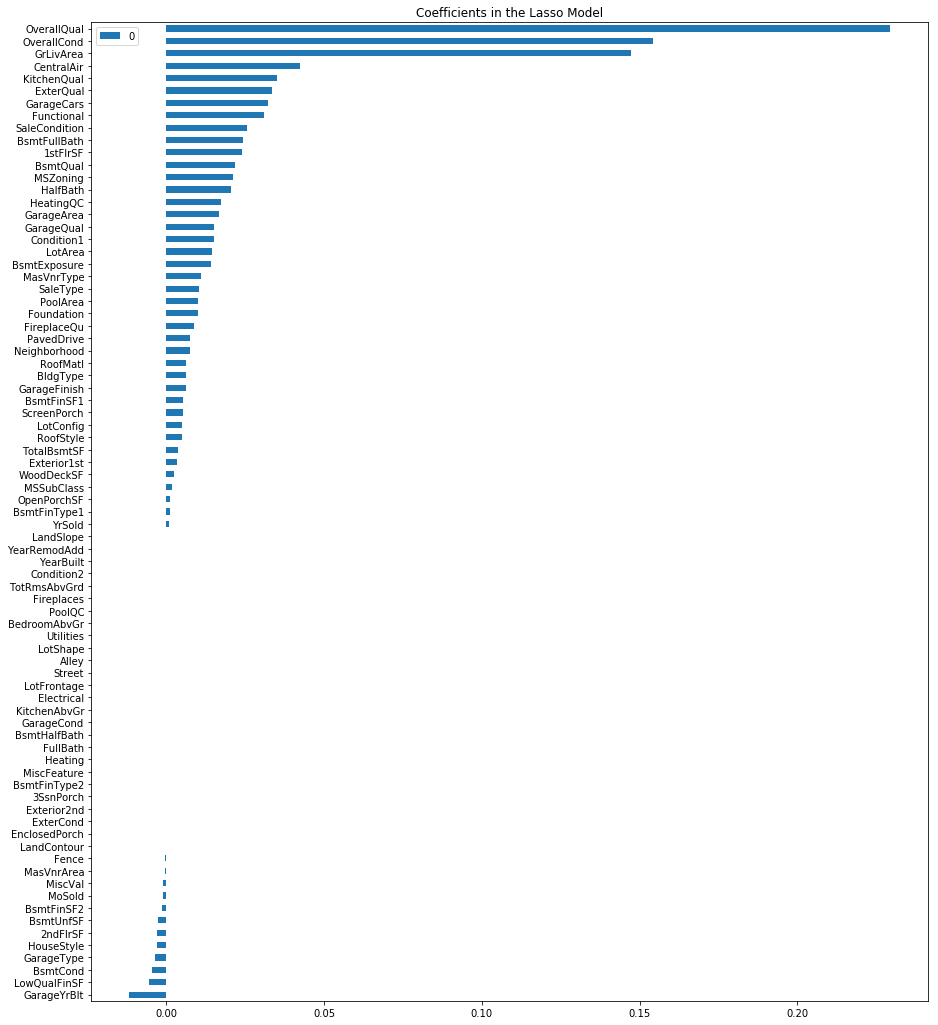

In [24]:
imp_coef = pd.DataFrame(coef.sort_values())
# imp_coef = pd.concat([coef.sort_values().head(30), \
#                       coef.sort_values().tail(12)])
imp_coef.plot(kind = 'barh', figsize = (15, 18))
plt.title('Coefficients in the Lasso Model')

In [25]:
type(model_lasso.predict(X_train.values)), model_lasso.predict(X_train.values).shape

(numpy.ndarray, (1458,))

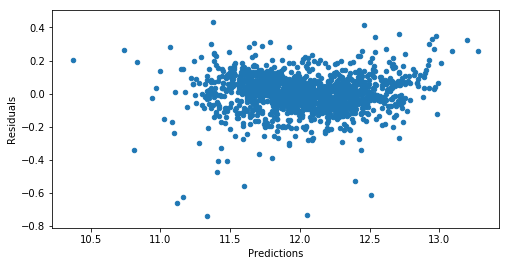

In [26]:
preds = pd.DataFrame({'Predictions': model_lasso.predict(X_train.values), \
                      'True': y_train.values.ravel()})
preds['Residuals'] = preds['True'] - preds['Predictions']
preds.plot(x = 'Predictions', y = 'Residuals',kind = 'scatter', figsize = (8, 4))

In [27]:
y_test = np.expm1(model_lasso.predict(X_test.values))
type(y_test), y_test.shape

(numpy.ndarray, (1459,))

In [28]:
submit = pd.DataFrame(columns = ['SalePrice'])
submit['Id'] = test_ID['Id']
submit['SalePrice'] = y_test
submit.head()

,SalePrice,Id
0,120705.370550,1461
1,164149.972580,1462
2,180137.616824,1463
3,198726.626642,1464
4,198637.556630,1465


In [56]:
submit.to_csv('./data/submission_02_lasso.csv', index=False)

In [57]:
1309/4406 # 0.12603 > 0.11717

0.2970948706309578

### 2. Ridge Regression

In [29]:
grid_param = [{'alpha': np.logspace(-4, 1, 1000)}]
ridge_search = GridSearchCV(estimator = linear_model.Ridge(), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ridge_search = ridge_search.fit(X_train, y_train)

In [59]:
# For grid_param = [{'alpha': np.linspace(0, 0.005, 1000)}]
# ridge_search.best_score_, ridge_search.best_params_

(0.9070037401822769, {'alpha': 0.005})

In [30]:
ridge_search.best_score_, ridge_search.best_params_

(0.9078181280702353, {'alpha': 4.070142453219439})

In [31]:
model_ridge = linear_model.Ridge(alpha = 4.070142453219439)
model_ridge = model_ridge.fit(X_train, y_train)
coef = pd.Series(model_ridge.coef_.flatten(), index = X_train.columns)
print('Ridge picked '+ str(sum(coef != 0)) + ' variables and eliminated the other ' + \
      str(sum(coef == 0)) + ' variables')

Ridge picked 79 variables and eliminated the other 0 variables


In [32]:
score = rmsle_cv(model_ridge)
print('Ridge score: {} ({})'.format(score.mean(), score.std()))

Ridge score: 0.12091399902901123 (0.003101570909198194)


In [33]:
data = pd.Series({'Model': 'Ridge', 'RMSLE.mean': score.mean(), 'RMSLE.std': score.std()})
model_score_df = model_score_df.append(data, ignore_index = True)
model_score_df

,Model,RMSLE.mean,RMSLE.std
0,Lasso,0.119717,0.003758
1,Ridge,0.120914,0.003102


Text(0.5,1,'Coefficients in the Ridge Model')

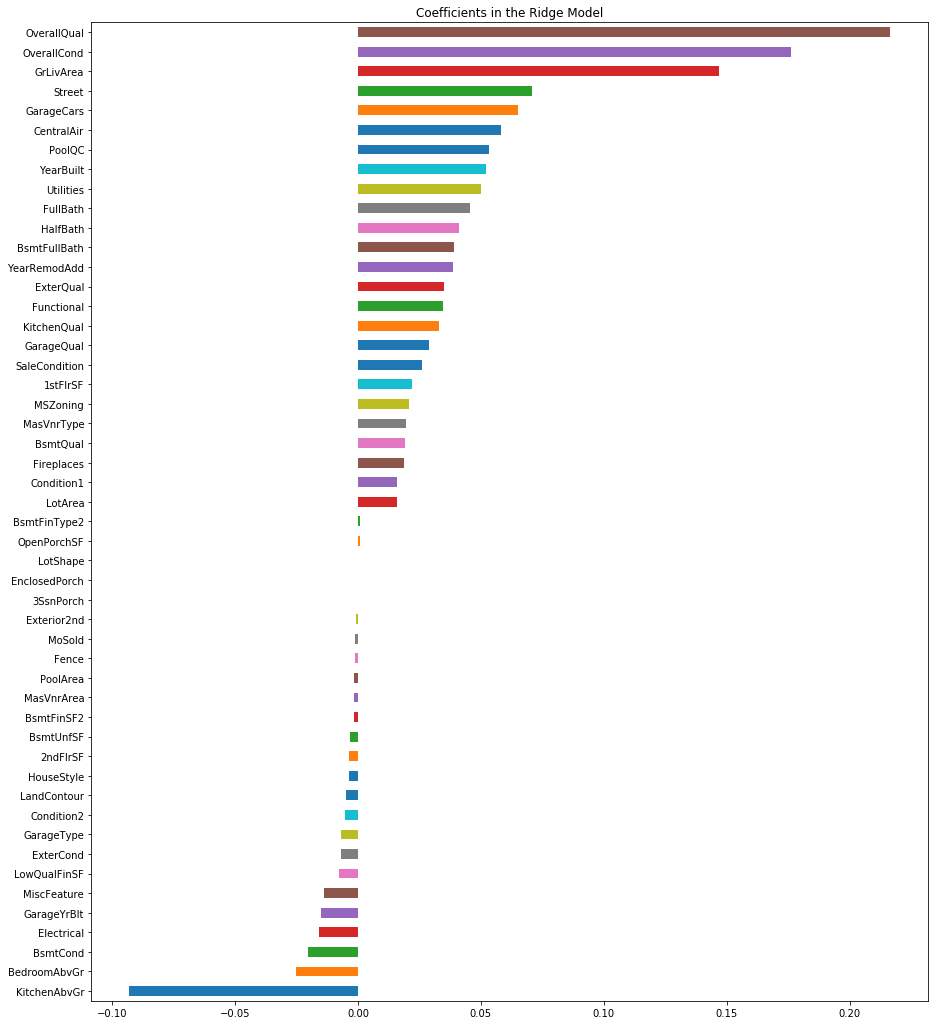

In [34]:
imp_coef = pd.concat([coef.sort_values().head(25), \
                      coef.sort_values().tail(25)])
# imp_coef = pd.DataFrame(coef.sort_values())
imp_coef.plot(kind = 'barh', figsize = (15, 18))
plt.title('Coefficients in the Ridge Model')

In [35]:
type(model_ridge.predict(X_train.values)), model_ridge.predict(X_train.values).shape

(numpy.ndarray, (1458, 1))

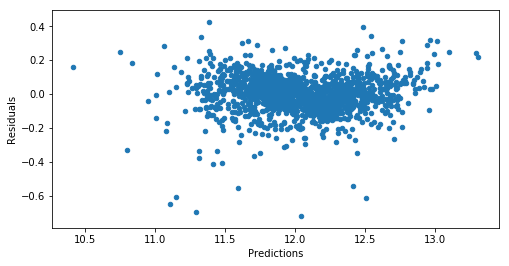

In [36]:
preds = pd.DataFrame({'Predictions': model_ridge.predict(X_train.values).flatten(), \
                      'True': y_train.values.ravel()})
preds['Residuals'] = preds['True'] - preds['Predictions']
preds.plot(x = 'Predictions', y = 'Residuals',kind = 'scatter', figsize = (8, 4))

In [37]:
y_test = np.expm1(model_ridge.predict(X_test.values).flatten())
type(y_test), y_test.shape

(numpy.ndarray, (1459,))

In [38]:
submit = pd.DataFrame(columns = ['SalePrice'])
submit['Id'] = test_ID['Id']
submit['SalePrice'] = y_test
submit.head()

,SalePrice,Id
0,116559.346061,1461
1,166177.166664,1462
2,179983.603223,1463
3,199017.576792,1464
4,198249.897972,1465


In [95]:
submit.to_csv('./data/submission_02_ridge.csv', index=False)

In [96]:
1266/4406 # 0.12555 > 0.11717

0.2873354516568316

### 3. Elastic Net Regression

In [39]:
# Round 1: change alpha, fix l1_ratio
grid_param = [{'alpha': np.logspace(-4, -2, 1000)}]
ENet_search = GridSearchCV(estimator = linear_model.ElasticNet(l1_ratio=0.9), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ENet_search = ENet_search.fit(X_train, y_train)

In [42]:
ENet_search.best_score_, ENet_search.best_params_

(0.9096264650753787, {'alpha': 0.001069126339173476})

In [45]:
# Round 2: fix alpha, change l1_ratio
grid_param = [{'l1_ratio': np.linspace(0, 1, 500)}]
ENet_search = GridSearchCV(estimator = linear_model.ElasticNet(alpha=0.001069126339173476), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ENet_search = ENet_search.fit(X_train, y_train)

In [46]:
ENet_search.best_score_, ENet_search.best_params_

(0.9096270804715096, {'l1_ratio': 0.9038076152304608})

In [49]:
# Round 3: change alpha, fix l1_ratio
grid_param = [{'alpha': np.linspace(0.0005, 0.0015, 1000)}]
ENet_search = GridSearchCV(estimator = linear_model.ElasticNet(l1_ratio=0.9038076152304608), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ENet_search = ENet_search.fit(X_train, y_train)

In [50]:
ENet_search.best_score_, ENet_search.best_params_

(0.9096273461742242, {'alpha': 0.0010665665665665666})

In [51]:
# Round 4: fix alpha, change l1_ratio
grid_param = [{'l1_ratio': np.linspace(0.8, 1, 500)}]
ENet_search = GridSearchCV(estimator = linear_model.ElasticNet(alpha=0.0010665665665665666), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ENet_search = ENet_search.fit(X_train, y_train)

In [52]:
ENet_search.best_score_, ENet_search.best_params_

(0.9096274379588684, {'l1_ratio': 0.905811623246493})

```Repeat......```

In [62]:
# Round 9: change alpha, fix l1_ratio
grid_param = [{'alpha': np.linspace(0.001, 0.0011, 1000)}]
ENet_search = GridSearchCV(estimator = linear_model.ElasticNet(l1_ratio=0.9093386773547094), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ENet_search = ENet_search.fit(X_train, y_train)

In [63]:
ENet_search.best_score_, ENet_search.best_params_

(0.9096282804937333, {'alpha': 0.0010604604604604606})

In [64]:
# Round 10: fix alpha, change l1_ratio
grid_param = [{'l1_ratio': np.linspace(0.90, 0.92, 500)}]
ENet_search = GridSearchCV(estimator = linear_model.ElasticNet(alpha=0.0010604604604604606), param_grid=grid_param, \
                           cv=n_folds, return_train_score=True)
ENet_search = ENet_search.fit(X_train, y_train)

In [65]:
ENet_search.best_score_, ENet_search.best_params_

(0.9096282892595083, {'l1_ratio': 0.9112224448897795})

The score seems converged, so no more rounds, take the last results as the best parameters

In [69]:
model_ENet = linear_model.ElasticNet(alpha = 0.0010604604604604606, l1_ratio = 0.9112224448897795)
model_ENet = model_ENet.fit(X_train, y_train)
coef = pd.Series(model_ENet.coef_.flatten(), index = X_train.columns)
print('ENet picked '+ str(sum(coef != 0)) + ' variables and eliminated the other ' + \
      str(sum(coef == 0)) + ' variables')

ENet picked 55 variables and eliminated the other 24 variables


In [67]:
score = rmsle_cv(model_ENet)
print('ENet score: {} ({})'.format(score.mean(), score.std()))

ENet score: 0.11972609137354588 (0.003749049454010668)


In [68]:
data = pd.Series({'Model': 'ENet', 'RMSLE.mean': score.mean(), 'RMSLE.std': score.std()})
model_score_df = model_score_df.append(data, ignore_index = True)
model_score_df

,Model,RMSLE.mean,RMSLE.std
0,Lasso,0.119717,0.003758
1,Ridge,0.120914,0.003102
2,ENet,0.119726,0.003749


Text(0.5,1,'Coefficients in the ENet Model')

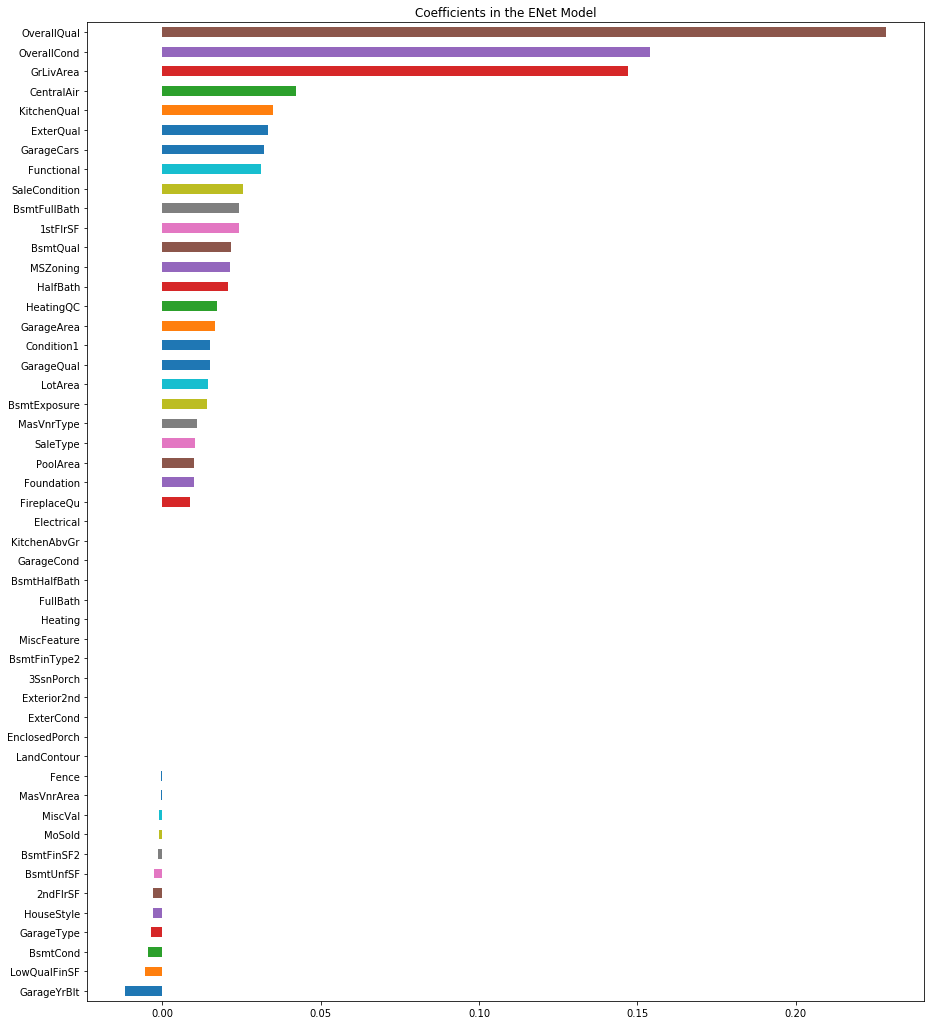

In [70]:
imp_coef = pd.concat([coef.sort_values().head(25),
                     coef.sort_values().tail(25)])
# imp_coef = pd.DataFrame(coef.sort_values())
imp_coef.plot(kind = 'barh', figsize = (15, 18))
plt.title('Coefficients in the ENet Model')

In [71]:
type(model_ENet.predict(X_train.values)), model_ENet.predict(X_train.values).shape

(numpy.ndarray, (1458,))

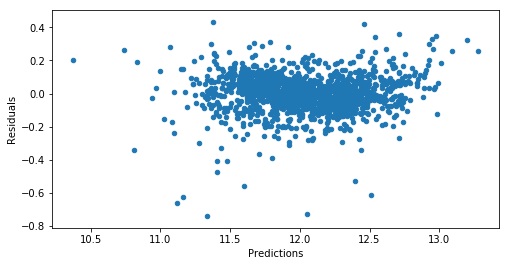

In [72]:
preds = pd.DataFrame({'Predictions': model_ENet.predict(X_train.values), \
                      'True': y_train.values.ravel()})
preds['Residuals'] = preds['True'] - preds['Predictions']
preds.plot(x = 'Predictions', y = 'Residuals',kind = 'scatter', figsize = (8, 4))

In [73]:
y_test = np.expm1(model_ENet.predict(X_test.values))
type(y_test), y_test.shape

(numpy.ndarray, (1459,))

In [74]:
submit = pd.DataFrame(columns = ['SalePrice'])
submit['Id'] = test_ID['Id']
submit['SalePrice'] = y_test
submit.head()

,SalePrice,Id
0,120723.313831,1461
1,164145.642675,1462
2,180196.026496,1463
3,198754.858795,1464
4,198617.432377,1465


In [75]:
submit.to_csv('./data/submission_02_ENet.csv', index=False)

In [76]:
1309/4406 # 0.12606 > 0.11717

0.2970948706309578